In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
at = pd.read_table("heart.txt",delimiter=',')
at

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,2.0,2.0,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0


**Data cleaning**

In [ ]:
at = at.drop_duplicates()
at

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,2.0,2.0,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
at.isna().sum()

age           0
sex           0
cp            0
trtbps       56
chol          7
fbs           7
restecg       0
thalachh     53
exng         53
oldpeak      56
slp         100
caa         195
thall       157
output        0
dtype: int64

In [ ]:
x = at["thall"].mean()
x
# replacing null values in thall with mean x
at['thall'].fillna(x, inplace = True)
at

<ipython-input-6-dd7e96a26927>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at['thall'].fillna(x, inplace = True)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,2.0,2.000000,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,5.619048,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,5.619048,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,5.619048,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,5.619048,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,5.619048,1
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,5.619048,0
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.000000,2
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,5.619048,0


In [ ]:
at.mean(axis=0)

age          59.356784
sex           0.969849
cp            3.507538
trtbps      133.650350
chol        178.536458
fbs           0.354167
restecg       0.733668
thalachh    122.828767
exng          0.643836
oldpeak       1.330070
slp           2.111111
caa           1.750000
thall         5.619048
output        1.517588
dtype: float64

In [ ]:
subset1 = at[['age','cp','chol']].iloc[:15]
subset1

,age,cp,chol
0,63,4,260.0
1,44,4,209.0
2,60,4,218.0
3,55,4,228.0
4,66,3,213.0
5,66,3,0.0
6,65,4,236.0
7,60,3,0.0
8,60,3,0.0
9,60,2,267.0


In [ ]:
subset2 = at[['age','chol','restecg']].iloc[:15]
subset2

,age,chol,restecg
0,63,260.0,1
1,44,209.0,1
2,60,218.0,1
3,55,228.0,1
4,66,213.0,2
5,66,0.0,1
6,65,236.0,1
7,60,0.0,1
8,60,0.0,0
9,60,267.0,1


In [ ]:
subset3 = at[['cp','restecg']].iloc[:15]
subset3

,cp,restecg
0,4,1
1,4,1
2,4,1
3,4,1
4,3,2
5,3,1
6,4,1
7,3,1
8,3,0
9,2,1


**Data Integration**

In [ ]:
integrate = pd.merge(subset1,subset2,on = 'age')
integrate

,age,cp,chol_x,chol_y,restecg
0,63,4,260.0,260.0,1
1,63,4,260.0,0.0,2
2,63,3,0.0,260.0,1
3,63,3,0.0,0.0,2
4,44,4,209.0,209.0,1
5,60,4,218.0,218.0,1
6,60,4,218.0,0.0,1
7,60,4,218.0,0.0,0
8,60,4,218.0,267.0,1
9,60,3,0.0,218.0,1


In [ ]:
at1 = pd.DataFrame(subset1)
at2 = pd.DataFrame(subset2)
at3 = pd.DataFrame(subset3)
concat_data = pd.concat([subset1,subset2])
concat_data

,age,cp,chol,restecg
0,63,4.0,260.0,NaN
1,44,4.0,209.0,NaN
2,60,4.0,218.0,NaN
3,55,4.0,228.0,NaN
4,66,3.0,213.0,NaN
5,66,3.0,0.0,NaN
6,65,4.0,236.0,NaN
7,60,3.0,0.0,NaN
8,60,3.0,0.0,NaN
9,60,2.0,267.0,NaN


In [ ]:
display(pd.merge(at1, at2, how='left'))

,age,cp,chol,restecg
0,63,4,260.0,1
1,44,4,209.0,1
2,60,4,218.0,1
3,55,4,228.0,1
4,66,3,213.0,2
5,66,3,0.0,1
6,65,4,236.0,1
7,60,3,0.0,1
8,60,3,0.0,0
9,60,3,0.0,1


**Data Transformation**

In [ ]:
log = np.log(at1['age'])
log

0     4.143135
1     3.784190
2     4.094345
3     4.007333
4     4.189655
5     4.189655
6     4.174387
7     4.094345
8     4.094345
9     4.094345
10    4.025352
11    4.077537
12    4.127134
13    4.143135
14    4.043051
Name: age, dtype: float64

In [ ]:
sq_root = np.sqrt(at1['age'])
sq_root

0     7.937254
1     6.633250
2     7.745967
3     7.416198
4     8.124038
5     8.124038
6     8.062258
7     7.745967
8     7.745967
9     7.745967
10    7.483315
11    7.681146
12    7.874008
13    7.937254
14    7.549834
Name: age, dtype: float64

In [ ]:
square = np.square(at3['cp'])
square

0     16
1     16
2     16
3     16
4      9
5      9
6     16
7      9
8      9
9      4
10     4
11    16
12    16
13     9
14    16
Name: cp, dtype: int64

In [ ]:
cube = (at1['age']**3)
cube

0     250047
1      85184
2     216000
3     166375
4     287496
5     287496
6     274625
7     216000
8     216000
9     216000
10    175616
11    205379
12    238328
13    250047
14    185193
Name: age, dtype: int64

In [ ]:
cube_root = np.cbrt(at3['cp'])
cube_root

0     1.587401
1     1.587401
2     1.587401
3     1.587401
4     1.442250
5     1.442250
6     1.587401
7     1.442250
8     1.442250
9     1.259921
10    1.259921
11    1.587401
12    1.587401
13    1.442250
14    1.587401
Name: cp, dtype: float64

**Model Building**

In [ ]:
heart_csv = pd.read_csv('/content/drive/MyDrive/DSBD/heart.csv')
heart_csv

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


**Error Correction**

In [ ]:
heart_csv['slp'] = heart_csv['slp'].clip(0,1)
heart_csv

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,1,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,1,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay,confusion_matrix

In [ ]:
X = heart_csv.drop('output', axis=1)
y = heart_csv['output']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [ ]:
classifier = DecisionTreeClassifier()

In [ ]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.74      0.69        35
           1       0.75      0.66      0.70        41

    accuracy                           0.70        76
   macro avg       0.70      0.70      0.70        76
weighted avg       0.70      0.70      0.70        76



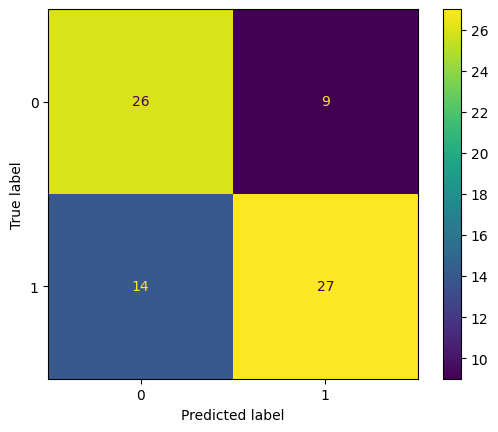

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.6973684210526315


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[26  9]
 [14 27]]
